In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

train = pd.read_csv('train_2.csv')
test = pd.read_csv('test_2.csv')
sample_sub = pd.read_csv('sample_submission_2.csv')
web = pd.read_csv('t1_webstat_2.csv')

In [ ]:
train['random_sum'] = train['root_id'] + train['parent_id'] + train['category_id'] + train['model_id']

In [ ]:
train['ct'] = train['category_id'] // 1000
train['mt'] = train['model_id'] // 10000

In [ ]:
train['create_time'] = pd.to_datetime(train['create_time'])
train['model_create_time'] = pd.to_datetime(train['model_create_time'])


In [ ]:
train['create_day'] = train['create_time'].dt.dayofyear 
train['create_month'] = train['create_time'].dt.month 
train['create_dow'] = train['create_time'].dt.dayofweek
train['create_hour'] = train['create_time'].dt.hour


In [ ]:
train['time_delta'] = train['create_time'] - train['model_create_time']

In [ ]:
train['time_delta'] = train['time_delta'].dt.days

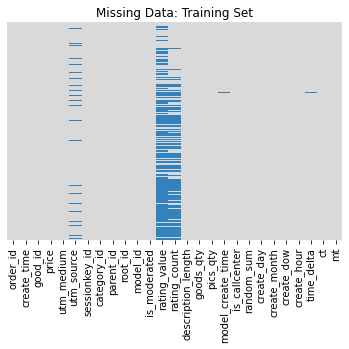

In [ ]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

<AxesSubplot:>

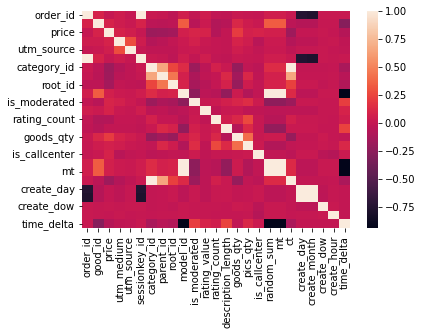

In [ ]:
corr = train.corr()
sns.heatmap(corr)

In [ ]:
#ЗДЕСЬ НАЧИНАЕТСЯ АДЕКВАТНЫЙ КОД 

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

train = pd.read_csv('train_2.csv')
train.create_time = pd.to_datetime(train.create_time)

test = pd.read_csv('test_2.csv')
test.create_time = pd.to_datetime(test.create_time)

web = pd.read_csv('t1_webstat_2.csv')
web.sort_values('date_time', inplace=True)
web.date_time = pd.to_datetime(web.date_time)

def vc_method(self):
    return self.value_counts(dropna=False, normalize=True)
pd.Series.vc = vc_method


web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334243 entries, 2268917 to 2059781
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   sessionkey_id          int64         
 1   date_time              datetime64[ns]
 2   page_type              int64         
 3   pageview_number        int64         
 4   pageview_duration_sec  float64       
 5   category_id            float64       
 6   model_id               float64       
 7   good_id                float64       
 8   price                  float64       
 9   product_in_sale        float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 279.8 MB


In [ ]:
#идеи для фич 

#количество разнообразных pagetype + 
#наибольшее проведённое время на странице + 
#количество разных category id + 
#количество нанов в какой-то колонке + (category )
#есть ли разница в последней просмотренной моделе/товаре (то есть верно ли x[0] == x[-1] + , мб ещё x[0] == x[1] хз)
#последний ряд - nan? + 
#есть ли в pageview_number пропущенные pages + 
#category id - не нан, при этом product in sale nan? и сколько раз
#category id - не nan, при этом model id и good id nan и сколько раз
#общее количество нанов вообще везде? 
#включить среднее время провождения на странице? 

#как-то закодировать категорию и модель 

In [ ]:
#идеи для фич 
#1. разница во времени между create_time и величиной из веб 
#2. посмотреть корреляцию всех фич 
#3. как нибудь посмотреть распределения и закодировать root_model_parent_id 
#4. попробовать точнее закодировать переменные некоторые как категориальные 


In [ ]:
session_agg_2 = web.groupby('sessionkey_id', sort=False).agg(
    difference_model = ('model_id', lambda x: x.iloc[0] == x.iloc[-1]), 
    difference_good = ('good_id', lambda x: x.iloc[0] == x.iloc[-1]),
    isna_category = ('category_id', lambda x: x.iloc[-1] == float('nan')), 
    isna_model = ('model_id', lambda x: x.iloc[-1] == float('nan')), 
    isna_good = ('good_id', lambda x: x.iloc[-1] == float('nan')), 
    page_match = ('pageview_number', lambda x: x.iloc[-1] == x.shape[0]), 
    price_seen = ('price', lambda x: np.nansum(x)), 
    unique_models = ('model_id', lambda x: len(np.unique(x))), 
    unique_goods = ('good_id', lambda x: len(np.unique(x))), 
    last_date = ('date_time', lambda x: x.iloc[-1])
) 
session_agg_2

,difference_model,difference_good,isna_category,isna_model,isna_good,page_match,price_seen,unique_models,unique_goods,last_date
sessionkey_id,,,,,,,,,,
109996122,False,False,False,False,False,True,0.0,1,1,1975-10-17 13:44:26.633
110019268,False,False,False,False,False,True,2986.0,2,2,1975-10-17 15:28:41.860
110020180,True,True,False,False,False,True,4490.0,1,1,1975-10-17 15:29:52.147
110040418,False,False,False,False,False,False,2312.0,3,3,1975-10-17 17:15:33.020
110044482,True,True,False,False,False,True,4490.0,1,1,1975-10-17 17:27:55.297
...,...,...,...,...,...,...,...,...,...,...
134626779,False,False,False,False,False,True,0.0,1,1,1976-02-16 20:47:13.283
134627402,False,False,False,False,False,False,411.0,2,2,1976-02-16 20:55:09.017
134628420,False,False,False,False,False,False,0.0,2,1,1976-02-16 20:59:14.477


In [ ]:
session_agg = web.groupby('sessionkey_id', sort=False).agg(
    unique_pages = ('page_type', lambda x: len(np.unique(x))),
    max_tipe = ('pageview_duration_sec', lambda x: np.nanmax(x)),
    unique_categories = ('category_id', lambda x: len(np.unique(x))), 
    number_of_nans = ('category_id', lambda x: sum(x.isna())), 
    mean_time_spent_online = ('pageview_duration_sec', lambda x: np.nanmean(x)),
    total_sec_dt=('date_time', lambda x: (x.iloc[-1] - x.iloc[0])), # 1
    total_sec_dur=('pageview_duration_sec', lambda x: np.nansum(x)), # 2
    ends_nan=('pageview_duration_sec', lambda x: int(pd.isna(x.iloc[-1]))), # 3
    last_page_type=('page_type', lambda x: x.iloc[-1]), # 4
    session_size=('page_type', lambda x: x.shape[0]), # 5. тут не важно какую колонку брать
    good_id_best_feature=('good_id', lambda x: (np.nanmedian(x) % 10).astype(bool) + False),
    category_id_best_feature=('category_id', lambda x: (np.nanmedian(x) % 10).astype(bool) + False),
    product_in_sale_best_feature=('product_in_sale', lambda x: pd.isna(x.iloc[-1]).__hash__() % 301 + 10),
    model_id_best_feature=('model_id', lambda x: (np.nanmedian(x) % 8).astype(bool) + False),
    med_time_spent_online = ('pageview_duration_sec', lambda x: np.nanmedian(x)),
    nan_max_pt = ('page_type', lambda x: np.nanmax(x)),
    nan_mean_pd = ('pageview_duration_sec', lambda x: np.nanmean(x))
)
session_agg

<ipython-input-17-2d27ee5abcfb>:3: RuntimeWarning: All-NaN axis encountered
  max_tipe = ('pageview_duration_sec', lambda x: np.nanmax(x)),
<ipython-input-17-2d27ee5abcfb>:6: RuntimeWarning: Mean of empty slice
  mean_time_spent_online = ('pageview_duration_sec', lambda x: np.nanmean(x)),
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
<ipython-input-17-2d27ee5abcfb>:18: RuntimeWarning: Mean of empty slice
  nan_mean_pd = ('pageview_duration_sec', lambda x: np.nanmean(x))


,unique_pages,max_tipe,unique_categories,number_of_nans,mean_time_spent_online,total_sec_dt,total_sec_dur,ends_nan,last_page_type,session_size,good_id_best_feature,category_id_best_feature,product_in_sale_best_feature,model_id_best_feature,med_time_spent_online,nan_max_pt,nan_mean_pd
sessionkey_id,,,,,,,,,,,,,,,,,
109996122,1,25.0,6,0,15.000000,0 days 00:01:29.680000,90.0,1,2,7,True,True,11,True,11.5,2,15.000000
110019268,2,122.0,2,2,82.500000,0 days 00:02:45.560000,165.0,1,7,3,True,True,11,True,82.5,7,82.500000
110020180,1,NaN,1,0,NaN,0 days 00:00:00,0.0,1,1,1,True,True,10,True,NaN,1,NaN
110040418,4,281.0,2,4,54.500000,0 days 00:09:51.490000,545.0,1,2,11,True,False,11,True,27.0,9,54.500000
110044482,1,NaN,1,0,NaN,0 days 00:00:00,0.0,1,1,1,True,True,10,True,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134626779,1,22.0,1,1,22.000000,0 days 00:00:00,22.0,0,3,1,True,True,11,True,22.0,3,22.000000
134627402,3,109.0,2,6,40.666667,0 days 00:04:58.784000,244.0,1,3,7,True,True,11,True,24.0,6,40.666667
134628420,4,45.0,3,3,23.250000,0 days 00:04:33.624000,93.0,1,2,5,True,True,11,True,22.0,5,23.250000


In [ ]:
session_agg['total_sec_dt'] = session_agg['total_sec_dt'].astype('timedelta64[s]') # теперь ок
session_agg['sec_diff'] = session_agg['total_sec_dt'] - session_agg['total_sec_dur'] # фича номер 6. зачем? дальше...
session_agg.reset_index(inplace=True)

In [ ]:
train['create_time'] = pd.to_datetime(train['create_time'])
train['model_create_time'] = pd.to_datetime(train['model_create_time'])

train['time_delta'] = train['create_time'] - train['model_create_time']
train['time_delta'] = train['time_delta'].dt.days

train['create_day'] = train['create_time'].dt.dayofyear 
train['create_month'] = train['create_time'].dt.month 
train['create_dow'] = train['create_time'].dt.dayofweek
train['create_hour'] = train['create_time'].dt.hour

train['model_create_day'] = train['model_create_time'].dt.dayofyear 
train['model_create_month'] = train['model_create_time'].dt.month 
train['model_create_dow'] = train['model_create_time'].dt.dayofweek
train['model_create_hour'] = train['model_create_time'].dt.hour

In [ ]:
test['create_time'] = pd.to_datetime(test['create_time'])
test['model_create_time'] = pd.to_datetime(test['model_create_time'])

test['time_delta'] = test['create_time'] - test['model_create_time']
test['time_delta'] = test['time_delta'].dt.days

test['create_day'] = test['create_time'].dt.dayofyear 
test['create_month'] = test['create_time'].dt.month 
test['create_dow'] = test['create_time'].dt.dayofweek
test['create_hour'] = test['create_time'].dt.hour

test['model_create_day'] = test['model_create_time'].dt.dayofyear 
test['model_create_month'] = test['model_create_time'].dt.month 
test['model_create_dow'] = test['model_create_time'].dt.dayofweek
test['model_create_hour'] = test['model_create_time'].dt.hour

In [ ]:
X_tr = train.merge(session_agg, how='left', on='sessionkey_id', sort=False)
X_tst = test.merge(session_agg, how='left', on='sessionkey_id', sort=False)

In [ ]:
X_tr = X_tr.merge(session_agg_2, how='left', on='sessionkey_id', sort=False)
X_tst = X_tst.merge(session_agg_2, how='left', on='sessionkey_id', sort=False)

In [ ]:
X_tr['time_create_diff'] = X_tr['create_time'] - X_tr['last_date']
X_tr['time_create_diff'] = X_tr['time_create_diff'].astype('timedelta64[s]')
X_tr['time_model_create_diff'] = X_tr['model_create_time']- X_tr['last_date']
X_tr['time_model_create_diff'] = X_tr['time_model_create_diff'].astype('timedelta64[s]')


In [ ]:
X_tst['time_create_diff'] = X_tst['create_time'] - X_tst['last_date']
X_tst['time_create_diff'] = X_tst['time_create_diff'].astype('timedelta64[s]')
X_tst['time_model_create_diff'] = X_tst['model_create_time']- X_tst['last_date']
X_tst['time_model_create_diff'] = X_tst['time_model_create_diff'].astype('timedelta64[s]')


In [ ]:
#разобраться с датами
X_tr['model_id_best_feature'] = X_tr['model_id_best_feature'].astype('category')
X_tr['good_id_best_feature'] = X_tr['good_id_best_feature'].astype('category')
X_tr['category_id_best_feature'] = X_tr['category_id_best_feature'].astype('category')
X_tr['difference_model'] = X_tr['difference_model'].astype('category')
X_tr['difference_good'] = X_tr['difference_good'].astype('category')
X_tr['isna_category'] = X_tr['isna_category'].astype('category')
X_tr['isna_model'] = X_tr['isna_model'].astype('category')
X_tr['isna_good'] = X_tr['isna_good'].astype('category')
X_tr['page_match'] = X_tr['page_match'].astype('category')
X_tr.drop(['create_time', 'model_create_time'], axis=1, inplace=True)

In [ ]:
X_tst['model_id_best_feature'] = X_tst['model_id_best_feature'].astype('category')
X_tst['good_id_best_feature'] = X_tst['good_id_best_feature'].astype('category')
X_tst['category_id_best_feature'] = X_tst['category_id_best_feature'].astype('category')
X_tst['model_id_best_feature'] = X_tst['model_id_best_feature'].astype('category')
X_tst['good_id_best_feature'] = X_tst['good_id_best_feature'].astype('category')
X_tst['category_id_best_feature'] = X_tst['category_id_best_feature'].astype('category')
X_tst['difference_model'] = X_tst['difference_model'].astype('category')
X_tst['difference_good'] = X_tst['difference_good'].astype('category')
X_tst['isna_category'] = X_tst['isna_category'].astype('category')
X_tst['isna_model'] = X_tst['isna_model'].astype('category')
X_tst['isna_good'] = X_tst['isna_good'].astype('category')
X_tst['page_match'] = X_tst['page_match'].astype('category')
X_tst.drop(['create_time', 'model_create_time'], axis=1, inplace=True)

In [ ]:
X_tr.drop(['last_date'], axis=1, inplace=True)

In [ ]:
X_tst.drop(['last_date'], axis=1, inplace=True)

<AxesSubplot:xlabel='is_callcenter', ylabel='sec_diff'>

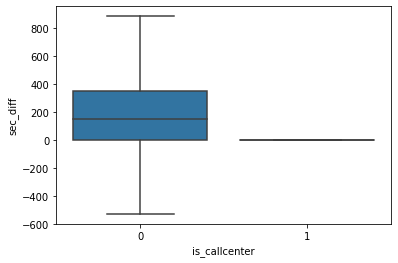

In [ ]:
import seaborn as sns

sns.boxplot(data=X_tr, y='sec_diff', x='is_callcenter', showfliers=False) # 0_0

In [ ]:
X = X_tr.drop('is_callcenter', axis=1)
y = X_tr['is_callcenter']

In [ ]:
from sklearn.model_selection import train_test_split
#features = session_agg.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(num_leaves=40, num_estimators=8)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9043


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_pred, y_test)

0.9076155615817475

In [ ]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9201
Test set score: 0.9043


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

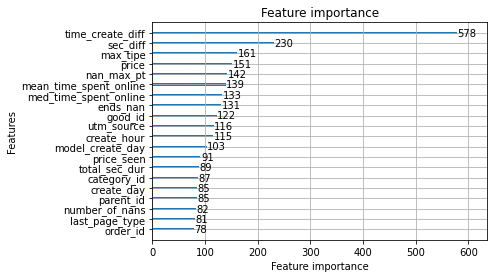

In [ ]:
lgb.plot_importance(clf, height=0.2, max_num_features=20)

In [ ]:
X_tst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17196 entries, 0 to 17195
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   order_id                      17196 non-null  int64   
 1   good_id                       17196 non-null  int64   
 2   price                         17196 non-null  int64   
 3   utm_medium                    17196 non-null  int64   
 4   utm_source                    15653 non-null  float64 
 5   sessionkey_id                 17196 non-null  int64   
 6   category_id                   17196 non-null  int64   
 7   parent_id                     17196 non-null  int64   
 8   root_id                       17196 non-null  int64   
 9   model_id                      17196 non-null  int64   
 10  is_moderated                  17196 non-null  int64   
 11  rating_value                  5162 non-null   float64 
 12  rating_count                  7919 non-null   

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import (train_test_split, GridSearchCV)

features = ['utm_medium', 'utm_source', 'sessionkey_id', 'unique_pages', 'max_tipe',
       'unique_categories', 'number_of_nans', 'mean_time_spent_online',
       'total_sec_dt', 'total_sec_dur', 'ends_nan', 'last_page_type',
       'session_size', 'good_id_best_feature', 'category_id_best_feature',
       'product_in_sale_best_feature', 'model_id_best_feature',
       'med_time_spent_online', 'nan_max_pt', 'nan_mean_pd', 'sec_diff', 'category_id', 'model_id', 'root_id', 'parent_id',
       'is_moderated', 'rating_value', 'rating_count', 'description_length', 'goods_qty', 'pics_qty', 'time_delta', 'create_day', 
       'create_month', 'create_dow', 'create_hour', 'model_create_day', 
       'model_create_month', 'model_create_dow', 'model_create_hour', 'difference_model', 'difference_good', 
       'isna_category', 'isna_model', 'isna_good', 'page_match', 'price_seen', 'unique_models', 'unique_goods', 'time_create_diff',
       'time_model_create_diff']

tr_data = lgb.Dataset(X_tr[features], label=X_tr.is_callcenter)
model = lgb.train({'eta': 0.1, 'objective': 'binary'}, tr_data, num_boost_round=75)

y_tst = model.predict(X_tst[features])

In [ ]:
res = pd.DataFrame({'order_id': X_tst.order_id, 'is_callcenter': y_tst})
# решил на первый раз не жестить :)
res.to_csv('wow.csv', index=False)

In [ ]:
a = pd.read_csv('wow.csv')
a

,order_id,is_callcenter
0,1350922,0.011076
1,1354989,0.011389
2,1352637,0.558241
3,1350050,0.771397
4,1341733,0.023698
...,...,...
17191,1358397,0.275023
17192,1357968,0.020212
17193,1358835,0.962585
17194,1365692,0.100951


<AxesSubplot:>

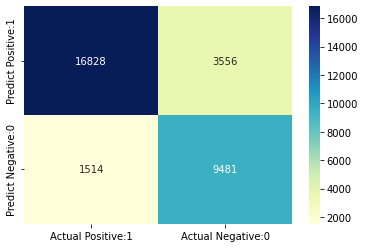

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 11.2 MB/s eta 0:00:00


In [ ]:
pip install shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

shap_values = shap.TreeExplainer(clf.booster_).shap_values(X_train)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


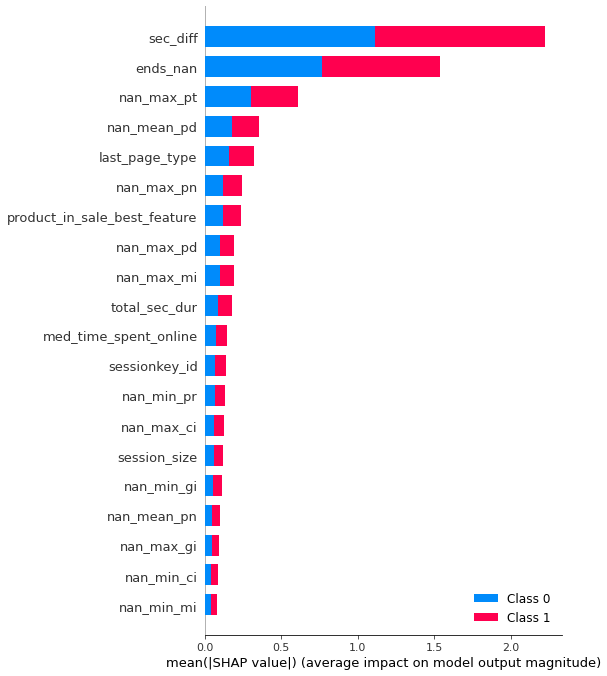

In [ ]:
shap.summary_plot(shap_values, X_train)